In [2]:
import pathlib as pl
import numpy as np
import pandas as pd
import os
import json
import matplotlib.pyplot as plt

In [3]:
# file reference for dataframe
json_file_path = pl.Path(os.path.abspath('')).parent.resolve() / "data_files/words/included_words_valset2_.json"

with open(json_file_path) as json_file:
    json_dict = json.load(json_file)

# Restructure the dictionary
word_dict = {}
for word, values in json_dict["words"].items():
    fake_count = values.get("fake", [0, 0])
    reliable_count = values.get("reliable", [0, 0])
    word_dict[word] = [fake_count, reliable_count]

# Convert the dictionary to a pandas dataframe
df_json = pd.DataFrame.from_dict(word_dict, orient="index", columns=["fake", "reliable"])
df_json.index.name = "word"

KeyboardInterrupt: 

In [ ]:
df = df_json.copy()

In [59]:
df = df_json.copy()
# filtering for fake and reliable and replacing NaN with [0,0]
df = df.filter(items=['fake', 'reliable'], axis=1)
df = df.rename(columns={'reliable':'real'})
print(len(df))

# apply [0,0] if nan
df = df.applymap(lambda x: [0,0] if x is np.nan else x)
print(len(df))

# unpacking tuples in columns fake and real
df['fake_art_freq'], df['fake_word_freq'] = zip(*df.fake)
df['real_art_freq'], df['real_word_freq'] = zip(*df.real)
# df = df[df.real_word_freq != 0] # step 1: reduces from 3857021 rows to 1597581 rows
# print(len(df))
# df = df[df.fake_word_freq != 0] # step 2: reduces from 1597581 rows to 514001 rows
# print(len(df))

df['fake_wa_ratio'] = round(df['fake_word_freq'] / df['fake_art_freq'],4)
df['real_wa_ratio'] = round(df['real_word_freq'] / df['real_art_freq'],4)

df['total_word_freq'] = df.fake_word_freq + df.real_word_freq
df['fake_real_ratio'] = df.fake_word_freq / df.real_word_freq

df = df.sort_values(by='total_word_freq', ascending=False)

#df["freq"] = round(df.iloc[:,0:9].sum(axis=1))
#df["freq_binary"] = df.fake + df.reliable
#df["ratio_binary"] = round(df.fake/df.reliable,4)
#df["score_binary"] = df.fake - df.reliable
#df = df.sort_values(by='freq_binary', ascending=False)
#df = df.sort_values(by='score_binary', ascending=False)

#print(f"Count of tokens when looking at all article types:          {len(df)}")
#df = df[df.freq_binary != 0]
#print(f"Count of tokens when looking only at 'fake' and 'reliable': {len(df)}")

3857021
3857021


In [62]:
begin = 75
end = begin + 30
df[begin:end]

,fake,real,fake_art_freq,fake_word_freq,real_art_freq,real_word_freq,fake_wa_ratio,real_wa_ratio,wa_ratio_delta,total_word_freq,fake_real_ratio
word,,,,,,,,,,,
time,"[438878, 920467]","[496345, 889060]",438878,920467,496345,889060,2.0973,1.7912,0.3061,1809527,1.035326
over,"[463916, 906153]","[503068, 856279]",463916,906153,503068,856279,1.9533,1.7021,0.2512,1762432,1.058245
just,"[428172, 911172]","[440149, 801837]",428172,911172,440149,801837,2.1281,1.8217,0.3064,1713009,1.136356
now,"[431323, 892431]","[441547, 787107]",431323,892431,441547,787107,2.0691,1.7826,0.2865,1679538,1.133812
my,"[285812, 905639]","[280811, 752103]",285812,905639,280811,752103,3.1687,2.6783,0.4904,1657742,1.204142
first,"[386400, 702313]","[516453, 949945]",386400,702313,516453,949945,1.8176,1.8394,-0.0218,1652258,0.739320
main,"[85910, 112500]","[704327, 1486836]",85910,112500,704327,1486836,1.3095,2.1110,-0.8015,1599336,0.075664
onli,"[424108, 869625]","[441509, 718371]",424108,869625,441509,718371,2.0505,1.6271,0.4234,1587996,1.210551
pleas,"[96507, 139208]","[481672, 1421114]",96507,139208,481672,1421114,1.4425,2.9504,-1.5079,1560322,0.097957


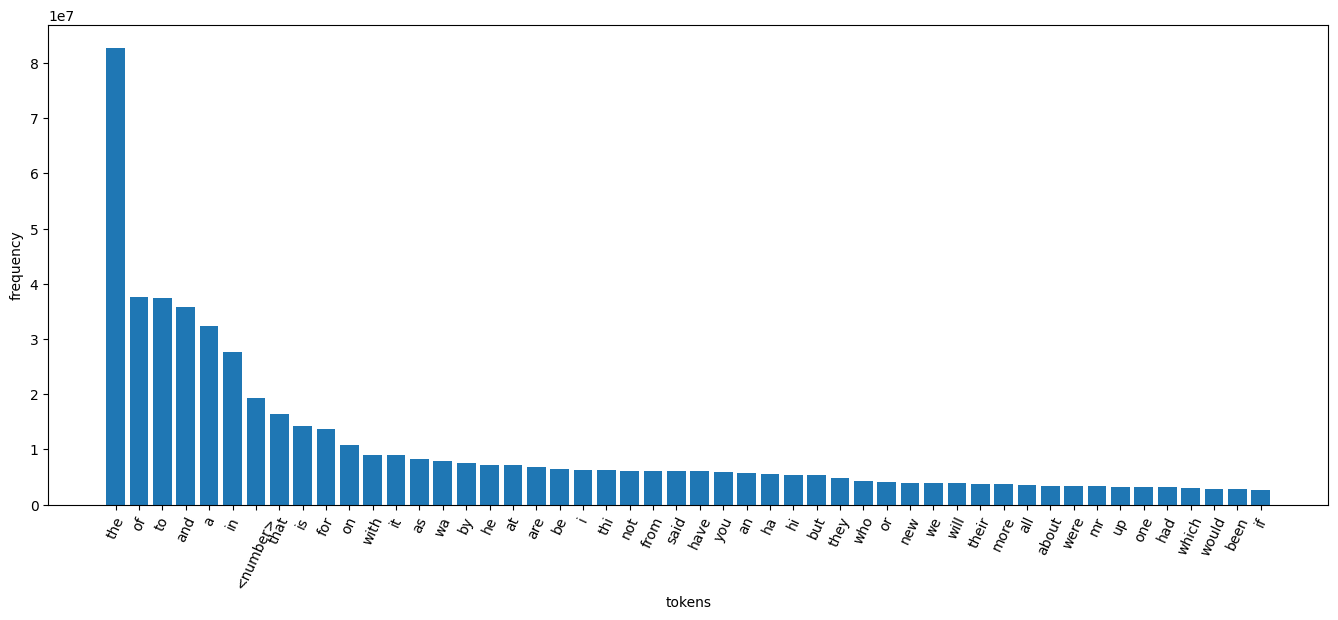

In [321]:
## Before removed stopwords
amount = 50
start = 0
end = start + amount

fig = plt.figure()
axes = fig.add_axes([0,0,2,1])
word = df.axes[0][start:end]
#score = df.[start:end]
freq = df.total_word_freq[start:end]
axes.bar(word, freq)
axes.set_ylabel('frequency')
axes.set_xlabel('tokens')
plt.xticks(rotation=65)
plt.show()

### After removed stopwords


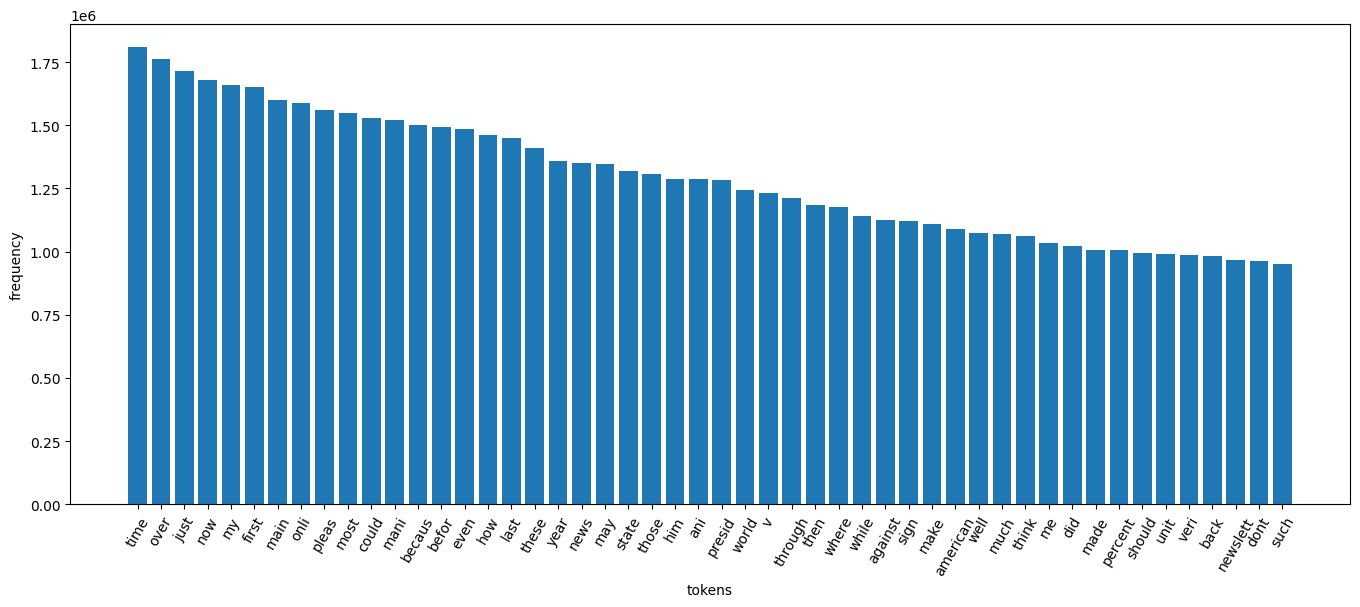

In [319]:
## After removed stopwords
amount = 50
start = 75
end = start + amount

#df = df.drop('<number><number>') # removing number 88

fig = plt.figure()
axes = fig.add_axes([0,0,2,1])
word = df.axes[0][start:end]
freq = df.total_word_freq[start:end]
axes.bar(word, freq)
axes.set_ylabel('frequency')
axes.set_xlabel('tokens')
plt.xticks(rotation=60)
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


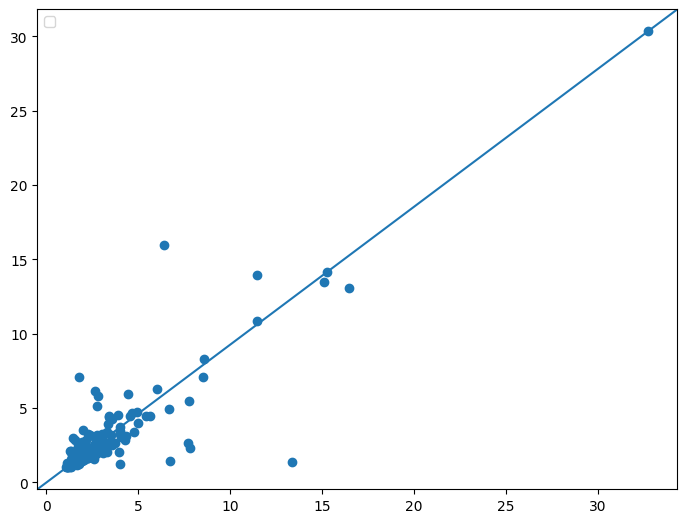

In [37]:
amount_ = 400
start_ = 0
end_ = start_ + amount_

ax = plt.figure().add_axes([0,0,1,1])
fake_ratio = df.fake_wa_ratio[start_:end_]
real_ratio = df.real_wa_ratio[start_:end_]
ax.scatter(fake_ratio, real_ratio)
ax.legend()
ax.plot([0, 1], [0, 1], transform=ax.transAxes)
plt.show()


In [4]:
model_path = pl.Path(os.path.abspath('')).parent.resolve() / "data_files/model_.csv"

df_model = pd.read_csv(model_path)

In [5]:
dfm = df_model.copy()
dfm = dfm.rename(columns={"Unnamed: 0":"word"})
# dfm = dfm.sort_values(by="idf_weight", ascending=True)
# shuffling
#dfm = dfm.sample(frac=1)
dfm[0:50].head()

,word,idf_weight,fakeness_score
0,time,1.087375,-0.015192
1,over,1.053978,-0.026592
2,just,1.161598,-0.065374
3,now,1.156373,-0.064113
4,my,1.588465,-0.098874


In [17]:
dfm.sort_values(by="fakeness_score",ascending=True)[dfm.idf_weight < 4][0:50]

C:\Users\45609\AppData\Local\Temp\ipykernel_28888\982015426.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  dfm.sort_values(by="fakeness_score",ascending=True)[dfm.idf_weight < 4][0:50]


,word,idf_weight,fakeness_score
682,blockchain,3.537125,-1.000000
1224,sputnik,3.893513,-1.000000
1076,bitcoin,3.504081,-1.000000
221,ne,3.772768,-1.000000
249,chto,3.816304,-1.000000
139,na,3.604902,-1.000000
437,po,3.755652,-1.000000
28,v,3.182516,-1.000000
1113,exceed,3.397466,-0.999996
1084,search,3.406872,-0.999906


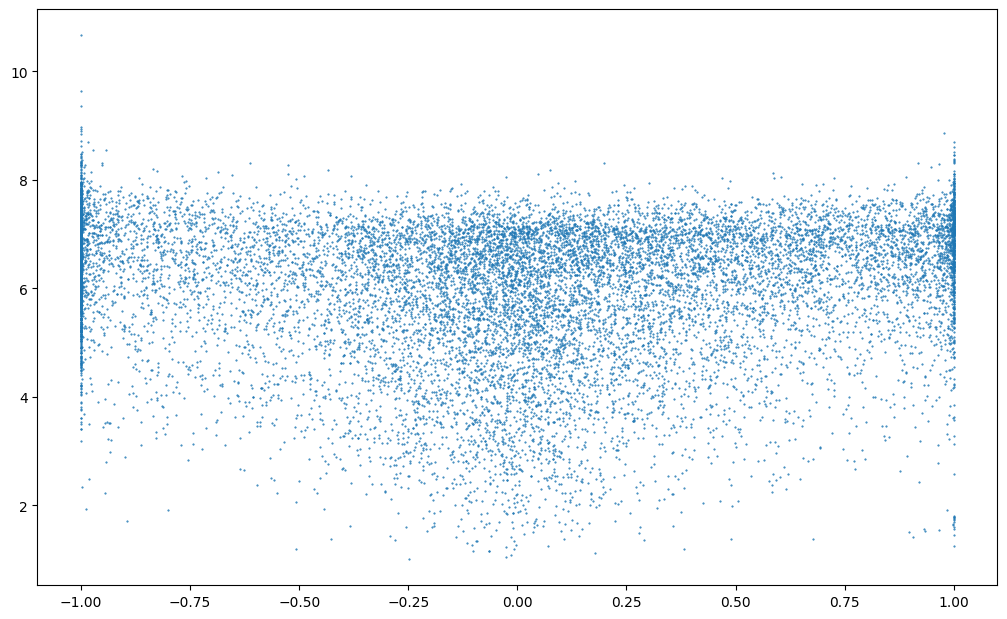

In [333]:
amount_ = len(dfm)
start_ = 0
end_ = start_ + amount_

ax = plt.figure().add_axes([0,0,1.5,1.2])
idf_weight = dfm.idf_weight[start_:end_]
fakeness_score = dfm.fakeness_score[start_:end_]
ax.scatter(fakeness_score, idf_weight, s=1, marker='.')
plt.show()

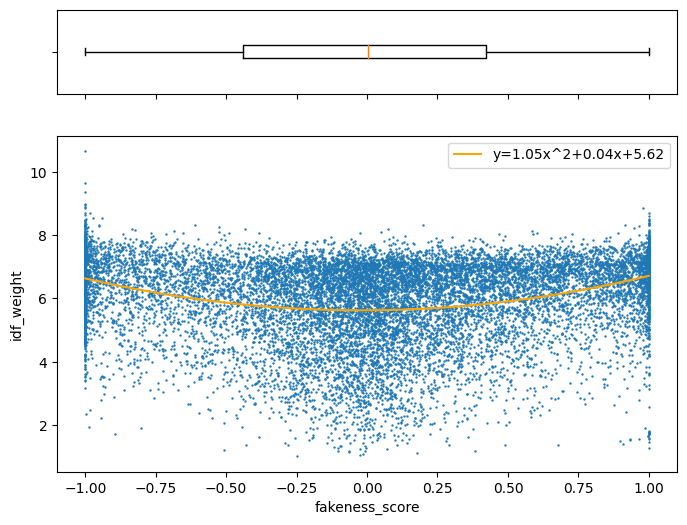

In [335]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress

fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(8, 6), sharex=True, gridspec_kw={'height_ratios':[2,8]})

idf_weight =     dfm.idf_weight
fakeness_score = dfm.fakeness_score

ax1.boxplot(fakeness_score, vert=False)
ax1.set_yticklabels([])

ax2.scatter(fakeness_score, idf_weight, s=2, marker='.')
ax2.set_ylabel('idf_weight')
ax2.set_xlabel('fakeness_score')

p = np.polyfit(fakeness_score, idf_weight, 2)
x_vals = np.linspace(fakeness_score.min(), fakeness_score.max(), 100)
y_vals = np.polyval(p, x_vals)
ax2.plot(x_vals, y_vals, color='orange', label=f'y={p[0]:.2f}x^2+{p[1]:.2f}x+{p[2]:.2f}')
ax2.legend()

plt.show()

### Plot of idf_weight vs fakeness_score for FakeNewsCorpus cleaned tokens

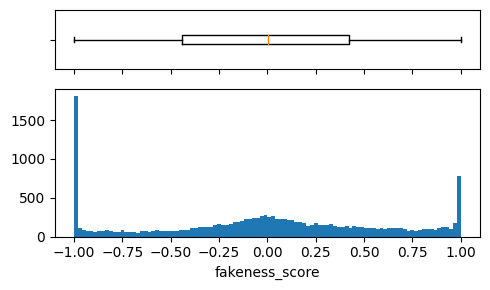

In [386]:

import matplotlib.pyplot as plt
import numpy as np 

fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(5, 3), sharex='col', gridspec_kw={'height_ratios':[1, 2.5]})

idf_weight = dfm.idf_weight
fakeness_score = dfm.fakeness_score

# Plot 1 - boxplot in blue color
ax1.boxplot(fakeness_score, vert=False)
ax1.set_yticklabels([])

# Plot 2 - scatter plot with a polynomial regression in blue color
ax2.hist(fakeness_score, bins=100)
ax2.set_xlabel('fakeness_score')

plt.tight_layout()
plt.show()


### Same plot for tokens in LIAR dataset

In [443]:
import ast
liar_path = pl.Path(os.path.abspath('')).parent.resolve() / "data_files/LIAR.csv"
df_liar = pd.read_csv(liar_path)

# Create an empty set to store the keys
liar_tokens = set()

# Iterate over each dictionary in the list and add its keys to the set
for dictionary in df_liar['words'].apply(ast.literal_eval):
    liar_tokens.update(dictionary.keys())

# Convert set of keys to dataframe
df_liar_tokens = pd.DataFrame()
df_liar_tokens['token'] = list(liar_tokens)

In [444]:
df_liar_tokens

,token
0,deutsch
1,audit
2,twobedroom
3,nickolau
4,fals
...,...
8692,funnel
8693,shortcom
8694,proud
8695,beckham


In [449]:
df_liar = dfm.copy() # 14963
df_liar = df_liar.merge(df_liar_tokens,"inner",left_on="word",right_on="token")

6040


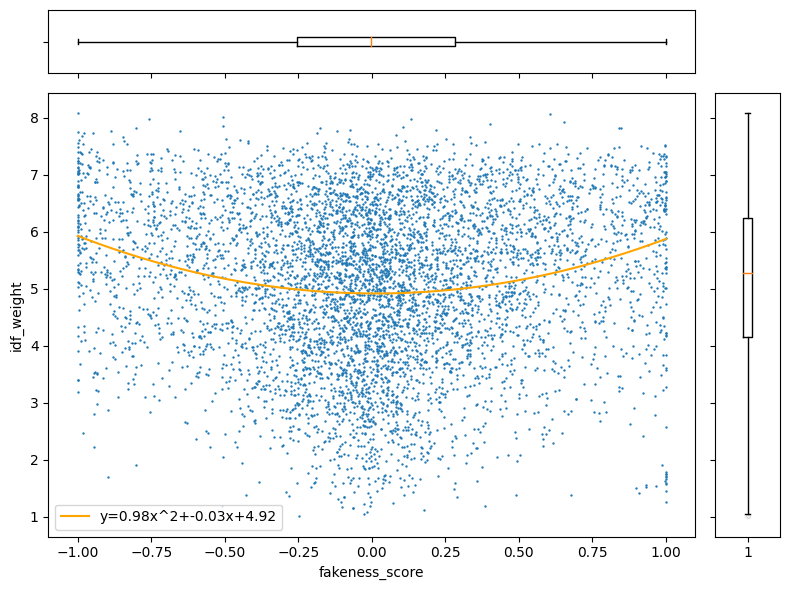

In [450]:
import matplotlib.pyplot as plt
import numpy as np


fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(8, 6), sharex='col', gridspec_kw={'height_ratios':[1, 7], 'width_ratios':[10, 1]})

idf_weight = df_liar.idf_weight
fakeness_score = df_liar.fakeness_score
print(len(idf_weight))

# Plot 1 - boxplot in blue color
axs[0,0].boxplot(fakeness_score, vert=False)
axs[0,0].set_yticklabels([])

# Plot 2 - scatter plot with a polynomial regression in blue color
axs[1,0].scatter(fakeness_score, idf_weight, s=2, marker='.')
axs[1,0].set_ylabel('idf_weight')
axs[1,0].set_xlabel('fakeness_score')

p = np.polyfit(fakeness_score, idf_weight, 2)
x_vals = np.linspace(fakeness_score.min(), fakeness_score.max(), 100)
y_vals = np.polyval(p, x_vals)
axs[1,0].plot(x_vals, y_vals, color='orange', label=f'y={p[0]:.2f}x^2+{p[1]:.2f}x+{p[2]:.2f}')
axs[1,0].legend()

# Plot 3 - empty plot in red color
axs[0,1].axis('off')

# Plot 4 - scatter plot with a polynomial regression in red color
axs[1,1].boxplot(idf_weight, vert=True, flierprops={'marker': 'o', 'markersize': 3, 'alpha':0.1, 'markerfacecolor':'gray'})
axs[1,1].set_yticklabels([])

plt.tight_layout()
plt.show()


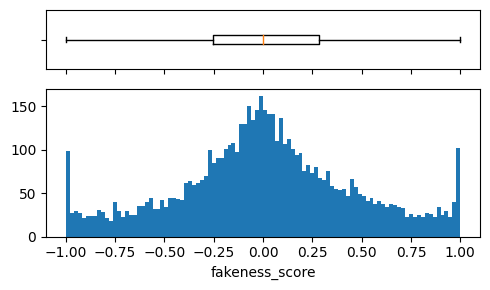

In [455]:

import matplotlib.pyplot as plt
import numpy as np 

fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(5, 3), sharex='col', gridspec_kw={'height_ratios':[1, 2.5]})

idf_weight = df_liar.idf_weight
fakeness_score = df_liar.fakeness_score

# Plot 1 - boxplot in blue color
ax1.boxplot(fakeness_score, vert=False)
ax1.set_yticklabels([])

# Plot 2 - scatter plot with a polynomial regression in blue color
ax2.hist(fakeness_score, bins=100)
ax2.set_xlabel('fakeness_score')

plt.tight_layout()
plt.show()
